# Geração da Tabela 1 - Ajustada com funções Sklearn

# Treinamentos de Detecção de Anomalias para geração de matriz de confusão sem exclusão de extremos

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
novatabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
tabelafinalrecall = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','fn','fp'])
print(tabelafinal)
   
def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    print('Acurácia='+str(ac))   
    pc=precision_score(Y,y_train_pred)*100
    print('Precisão='+str(pc))
    rc=recall_score(Y,y_train_pred)*100
    print('Recall='+str(rc))
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))

def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
      
def calcula_anomalias(clf_name,parametros):
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if fp<menorfp:
           mcont=contamination
           menorfp=fp
           melhoracuracia=ac
        else:
            if fp==menorfp:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfp=fp
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+":")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def calcula_anomalias_acuracia_fp(clf_name,parametros):
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        if ac>melhoracuracia:
           mcont=contamination
           menorfp=fp
           melhoracuracia=ac
        else:
            if ac==melhoracuracia:
                if fp<menorfp:
                   mcont=contamination
                   menorfp=fp
                   melhoracuracia=ac                
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Acurácia-fp:")
    print('Contaminação utilizada='+str(contamination))
    return contamination


def calcula_anomalias_recall_acuracia_fp(clf_name,parametros):
    melhorrc = 0
    menorfp=len(X)
    melhoracuracia=0
    mcont=0
    contamination=0.01
    while contamination<0.16:
        funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
        clf = eval(funcao)
        clf.fit(X)
        tn, fp, fn, tp = confusion_matrix(Y,clf.labels_).ravel()
        ac=accuracy_score(Y,clf.labels_)
        rc=recall_score(Y,clf.labels_)
        if rc>melhorrc:
           mcont=contamination
           menorfp=fp
           melhorrc=rc
           melhoracuracia=ac
        else:
            if rc==melhorrc:
                if ac>melhoracuracia:
                   mcont=contamination
                   menorfp=fp
                   melhorrc=rc
                   melhoracuracia=ac
                else:
                    if ac==melhoracuracia:
                        if fp<menorfp:
                           mcont=contamination
                           menorfp=fp
                           melhorrc=rc
                           melhoracuracia=ac               
        contamination=contamination+0.01
    contamination=mcont
    print("Avaliação do modelo "+clf_name+" com Recall-Acurácia-fp:")
    print('Contaminação utilizada='+str(contamination))
    return contamination

def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    novatabelafinal.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 
    
def grava_avaliacao_recall_acuracia_fp(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na nova tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=accuracy_score(Y,y_train_pred)*100
    pc=precision_score(Y,y_train_pred)*100
    rc=recall_score(Y,y_train_pred)*100
    tabelafinalrecall.loc[len(tabelafinal.index)] = [clf_name,contamination,ac,pc,rc,fn,fp] 

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []
Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, fn, fp]
Index: []


# Carrega dados de arquivo CSV  
Separando catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM 
RETORNÁVEL', Grupo: '89', SUBSISTÊNCIA Classe: '8960', BEBIDAS NÃO ALCOÓLICAS PDM: '19555', ÁGUA MINERAL NATURAL

In [2]:
def load_itens(path):
    csv_path = os.path.join(path,"aguatabela2.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
df = df.drop(['data'],axis=1)
print(df)
dfajustado=df

     quantidade  valor_unitario  anomalia
0           420           12.00         0
1         28000            5.88         1
2           360            7.70         0
3           120            7.70         0
4          2985            4.20         0
..          ...             ...       ...
389        1440           11.37         0
390        4608            0.62         1
391        1440           10.58         0
392        4608            0.54         1
393          10           20.00         1

[394 rows x 3 columns]


# Separação do Label dos dados

In [3]:

X = dfajustado.iloc[:, :-1]
Y = dfajustado.iloc[:, -1]
print(X)
print(Y)
# X = dfajustado esta linha estava gerando valores errados, já que incluia o campo anomalia no treinamento

     quantidade  valor_unitario
0           420           12.00
1         28000            5.88
2           360            7.70
3           120            7.70
4          2985            4.20
..          ...             ...
389        1440           11.37
390        4608            0.62
391        1440           10.58
392        4608            0.54
393          10           20.00

[394 rows x 2 columns]
0      0
1      1
2      0
3      0
4      0
      ..
389    0
390    1
391    0
392    1
393    1
Name: anomalia, Length: 394, dtype: int64


Avaliação do modelo PCA:
Contaminação utilizada=0.02
Acurácia=85.27918781725889
Precisão=100.0
Recall=12.121212121212121
Falso Negativo=58
Falso Positivo=0



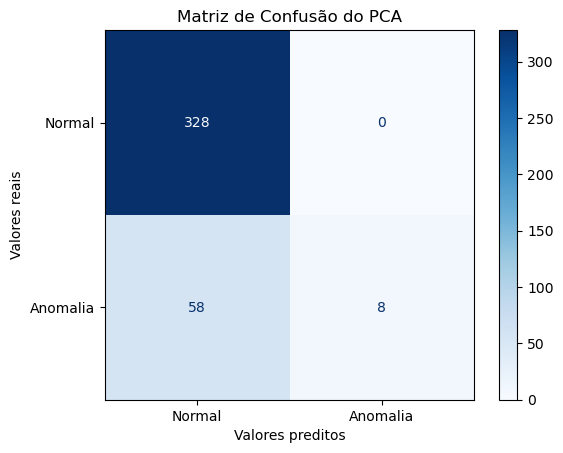

Avaliação do modelo PCA com Acurácia-fp:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



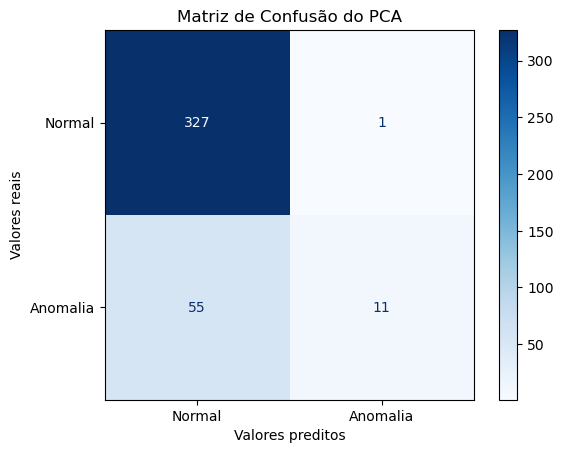

Avaliação do modelo PCA com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=79.94923857868021
Precisão=38.983050847457626
Recall=34.84848484848485
Falso Negativo=43
Falso Positivo=36



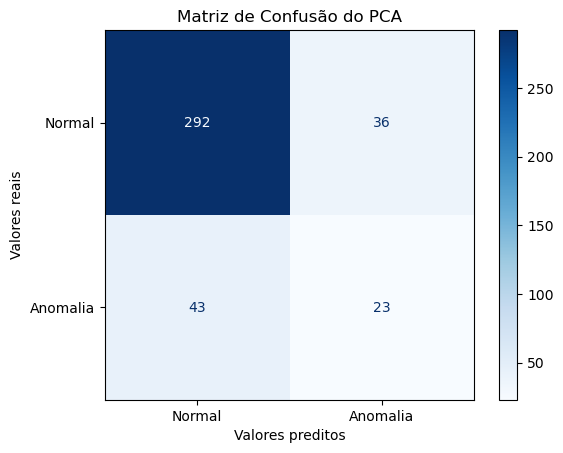

In [4]:
from pyod.models.pca import PCA
# Treinar algoritmo PCA para encontrar melhor contaminação
clf_name = 'PCA'
parametros='n_components=2,n_selected_components=2,'

#################################################################
# Calcula melhor contaminação primeiro com falso positivo depois acurárica
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com acurácia depois com falso positivo 
contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo OCSVM:
Contaminação utilizada=0.01
Acurácia=82.23350253807106
Precisão=0.0
Recall=0.0
Falso Negativo=66
Falso Positivo=4



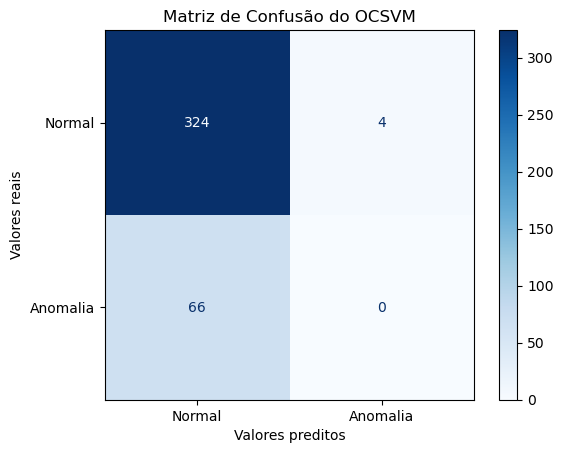

Avaliação do modelo OCSVM com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=82.23350253807106
Precisão=0.0
Recall=0.0
Falso Negativo=66
Falso Positivo=4



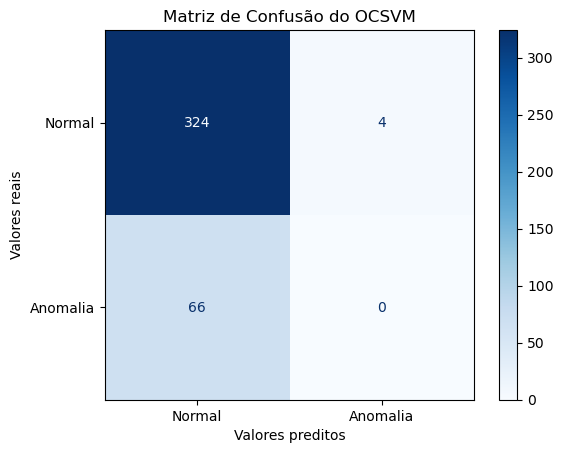

Avaliação do modelo OCSVM com Recall-Acurácia-fp:
Contaminação utilizada=0.13999999999999999
Acurácia=72.08121827411168
Precisão=10.714285714285714
Recall=9.090909090909092
Falso Negativo=60
Falso Positivo=50



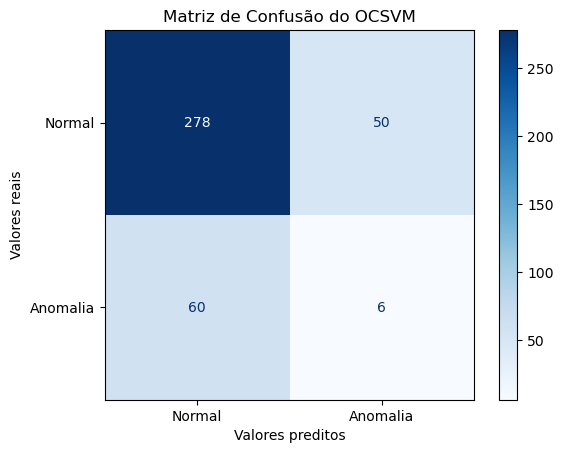

In [5]:
from pyod.models.ocsvm import OCSVM
# train OCSVM detector
clf_name = 'OCSVM'
parametros=''
contamination=calcula_anomalias(clf_name,'')

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

24
Avaliação do modelo LOF:
Contaminação utilizada=0.03
Acurácia=86.29441624365482
Precisão=100.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=0



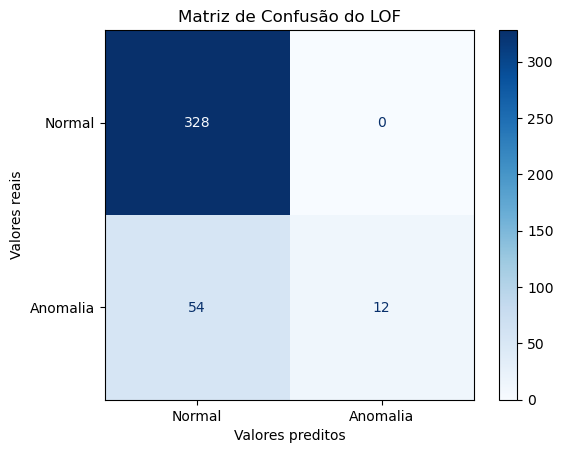

Avaliação do modelo LOF com Acurácia-fp:
Contaminação utilizada=0.03
Acurácia=86.29441624365482
Precisão=100.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=0



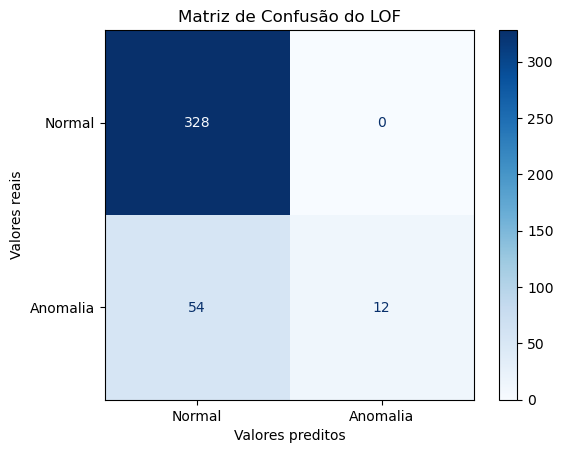

Avaliação do modelo LOF com Recall-Acurácia-fp:
Contaminação utilizada=0.15
Acurácia=80.96446700507614
Precisão=42.3728813559322
Recall=37.878787878787875
Falso Negativo=41
Falso Positivo=34



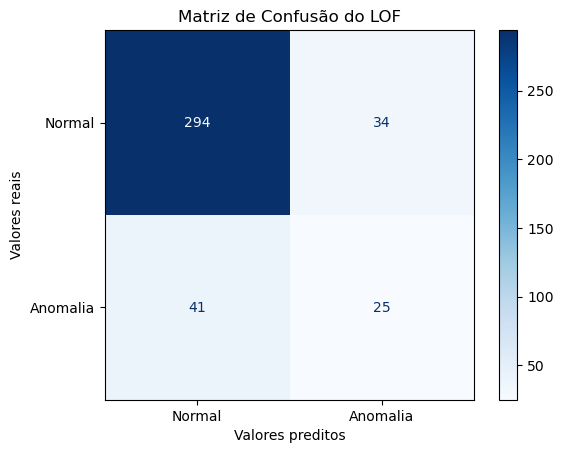

In [6]:
from pyod.models.lof import LOF
# train LOF detector
clf_name = 'LOF'
itens = len(X)/2
vizinhos=2
macuracia=0
nv=2
while vizinhos<itens: 
    clf = LOF(n_neighbors=vizinhos,contamination=contamination)
    clf.fit(X)
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)        
    ac=accuracy_score(Y,y_train_pred)
    if ac>macuracia:
        nv=vizinhos
        macuracia=ac
    vizinhos=vizinhos+1

print(nv)    

parametros='n_neighbors='+str(nv)+','
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo CBLOF:
Contaminação utilizada=0.02
Acurácia=85.27918781725889
Precisão=100.0
Recall=12.121212121212121
Falso Negativo=58
Falso Positivo=0



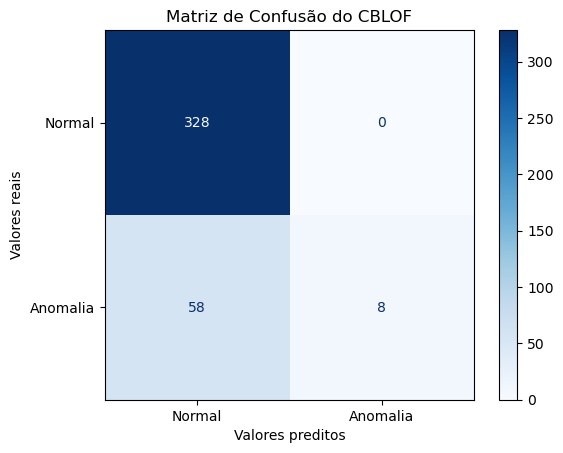

Avaliação do modelo CBLOF com Acurácia-fp:
Contaminação utilizada=0.03
Acurácia=85.78680203045685
Precisão=91.66666666666666
Recall=16.666666666666664
Falso Negativo=55
Falso Positivo=1



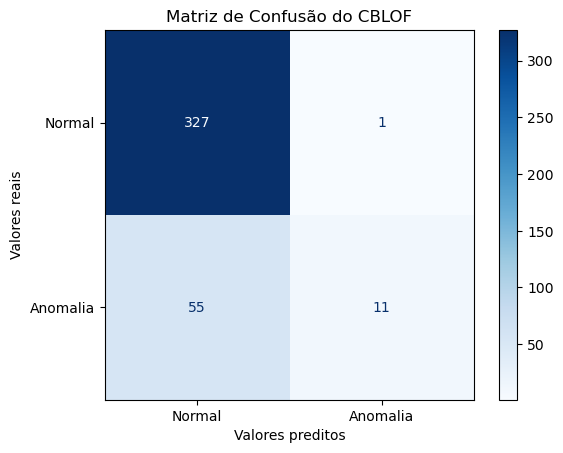

Avaliação do modelo CBLOF com Recall-Acurácia-fp:
Contaminação utilizada=0.09
Acurácia=81.7258883248731
Precisão=41.66666666666667
Recall=22.727272727272727
Falso Negativo=51
Falso Positivo=21



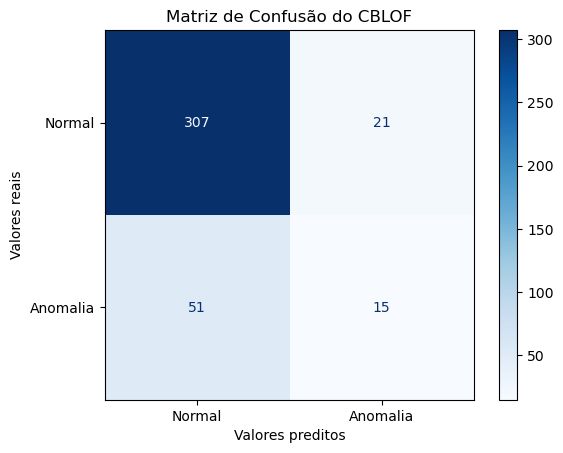

In [7]:
from pyod.models.cblof import CBLOF
# train CBLOF detector
clf_name = 'CBLOF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

Avaliação do modelo COF:
Contaminação utilizada=0.01
Acurácia=84.26395939086294
Precisão=100.0
Recall=6.0606060606060606
Falso Negativo=62
Falso Positivo=0



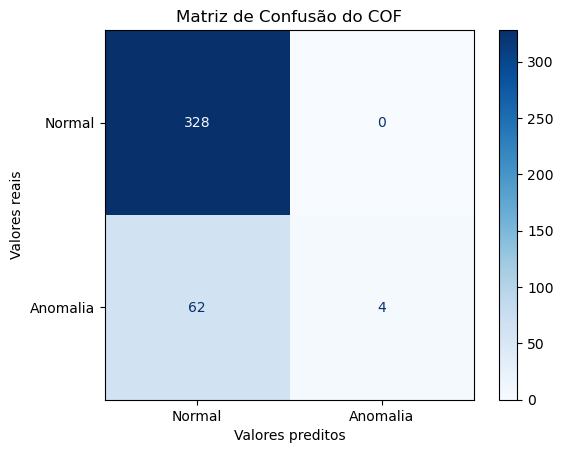

Avaliação do modelo COF com Acurácia-fp:
Contaminação utilizada=0.01
Acurácia=84.26395939086294
Precisão=100.0
Recall=6.0606060606060606
Falso Negativo=62
Falso Positivo=0



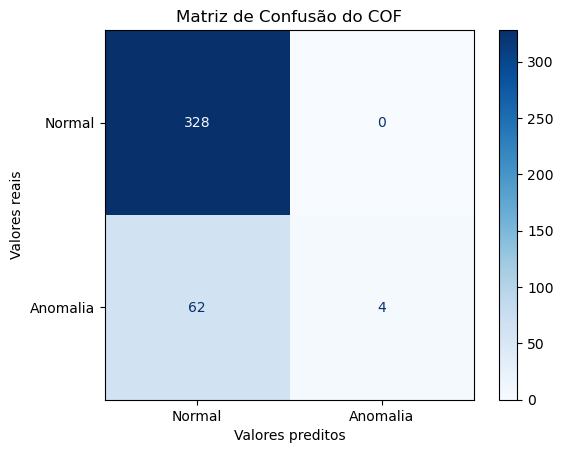

Avaliação do modelo COF com Recall-Acurácia-fp:
Contaminação utilizada=0.09999999999999999
Acurácia=79.18781725888326
Precisão=30.0
Recall=18.181818181818183
Falso Negativo=54
Falso Positivo=28



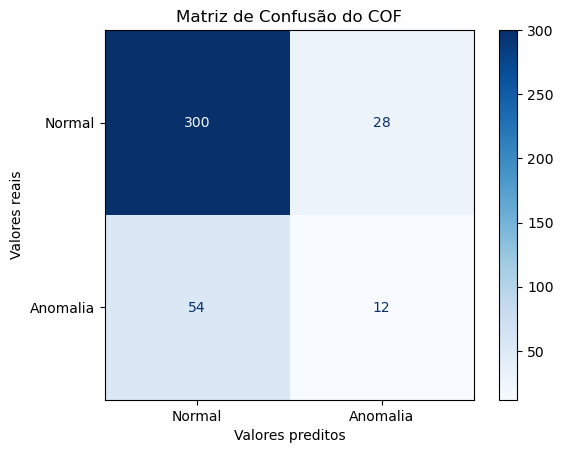

In [8]:
from pyod.models.cof import COF
# train COF detector
clf_name = 'COF' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.hbos import HBOS

# train HBOS detector
clf_name = 'HBOS'
parametros='n_bins=35, alpha=contamination,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.knn import KNN
# train KNN detector
clf_name = 'KNN'
parametros='n_neighbors=35,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.sod import SOD
# train SOD detector
clf_name = 'SOD' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.copod import COPOD
# train COPOD detector
clf_name = 'COPOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.ecod import ECOD
# train ECOD detector
clf_name = 'ECOD'
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.iforest import IForest
# train IForest detector
clf_name = 'IForest'
itens = len(X)
estimadores = len(X)//10
if estimadores<2: estimadores=2

parametros='n_estimators=estimadores,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.loda import LODA
# train LODA detector
clf_name = 'LODA' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.deep_svdd import DeepSVDD
# train DeepSVDD detector
clf_name = 'DeepSVDD'
parametros='verbose=0,preprocessing=True,'
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
from pyod.models.gmm import GMM
# train GMM detector
clf_name = 'GMM' 
parametros=''
contamination=calcula_anomalias(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

contamination=calcula_anomalias_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

#################################################################
# Calcula melhor contaminação primeiro com recall depois acurácia depois com falso positivo 
contamination=calcula_anomalias_recall_acuracia_fp(clf_name,parametros)

# Avaliar o algoritmo na melhor contaminação
funcao=clf_name+'('+parametros+'contamination='+str(contamination)+')'
clf = eval(funcao)
clf.fit(X)
avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
print('')

# Gerar matriz de confusão e gravar a avaliação na tabela 
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao_recall_acuracia_fp(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

In [ ]:
tabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinal)

In [ ]:
novatabelafinal.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(novatabelafinal)

In [ ]:
tabelafinalrecall.sort_values("acuracia", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
print(tabelafinalrecall)